#UNI Machine Learning Course
#Lab 04:  Regresión logística

 En este lab haremos un breve resumen de probabilidad y exploraremos por que regresión logística es una mejor alternativa para la clasificación que usar regresion lineal. Trataremos de entender la regresión logística e interpretar los coeficientes de su regresión. Finalmente trataremos de ver como funciona la regresión logística con características categóricas y comparala  con otros modelos.
 
 ## Que es regresion logistica
 
 En regresion lineal: la respuesta es continua y se modela como una combinación lineal de las variables de características:

$$y = \theta_0 + \theta_1x$$

En regresion logistica: las probabilidades de una respuesta categórica si son "verdaderas" equivalen a 1 y se modelan como una combinación lineal de las características y esto se llama la función logit.  La regresión logística produce las probabilidades de una clase específica y esas probabilidades se pueden convertir en predicciones de clase.


$$\log \left( \frac{p}{ 1-p} \right) = \theta_0 + \theta_1x$$

La ecuación se puede reorganizar en la función logística y queda

$$p= \frac{e^{\theta_0 + \theta_1x}} {1 + e^{\theta_0 + \theta_1x}}$$

La función logística tiene la propiedadad de tomar forma de "s" y la salida está limitada entre 0 y 1

### Ventajas:

1. Altamente interpretable 
2. El modelo de entrenamiento y de prediccion son rapidos de realizar.
3. No se requiere ajuste (excluyendo la regularización)
4. Las características no necesitan ser escalares
5. Puede desempeñarse bien con un pequeño numero de observaciones
6. Produce probabilidades  bien calibradas

### Desventajas :

1. Presume una relación lineal entre las características y las probabilidades de la respuesta
2. El rendimiento (generalmente) no es competitivo con los mejores métodos de aprendizaje supervisado
3. No puede aprender automáticamente las interacciones de características.



# Problema: Glass Identification Data Set
Resumen: del Servicio de Ciencias Forenses de los Estados Unidos; 6 tipos de vidrio; definidos en términos de su contenido de óxido (es decir, Na, Fe, K, etc.)

El estudio de clasificación de tipos de vidrio fue motivado por investigación criminológica. En la escena del crimen, el vaso que se deja puede  ser usado como evidencia ... ¡si se identifica correctamente!


https://archive.ics.uci.edu/ml/datasets/glass+identification

Solo vamos a  cubier como funciona los  problemas de clasificación binaria (dos clases) usando regresion logistica.  Pero para modelos de clasificación  multiple  ("one vs all") se puede  descomponer en problemas de múltiples clasificadores binarios. La regresión logística multinomial puede resolver esto como un solo problema.

## Parte 1: Predecir una respuesta continua y transformarla a respuesta categórica

In [0]:
# glass identification dataset
import numpy as np
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['Id','Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe','Tipo']

glass = pd.read_csv(url, names=col_names, index_col='Id')

glass.sort_values('Na', inplace=True)

glass.sample(5)


,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo
Id,,,,,,,,,,
198,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00,7
52,1.51926,13.20,3.33,1.28,72.36,0.60,9.14,0.00,0.11,1
99,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.00,0.00,2
143,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25,2
170,1.51994,13.27,0.00,1.76,73.03,0.47,11.32,0.00,0.00,5


## Atributos:

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps

##¿Cómo podríamos predecir Ri si nuestra única característica es Na?

Podríamos enmarcarlo como un problema de regresión y usar un modelo de regresión lineal con Na como la única característica y Ri como respuesta.

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


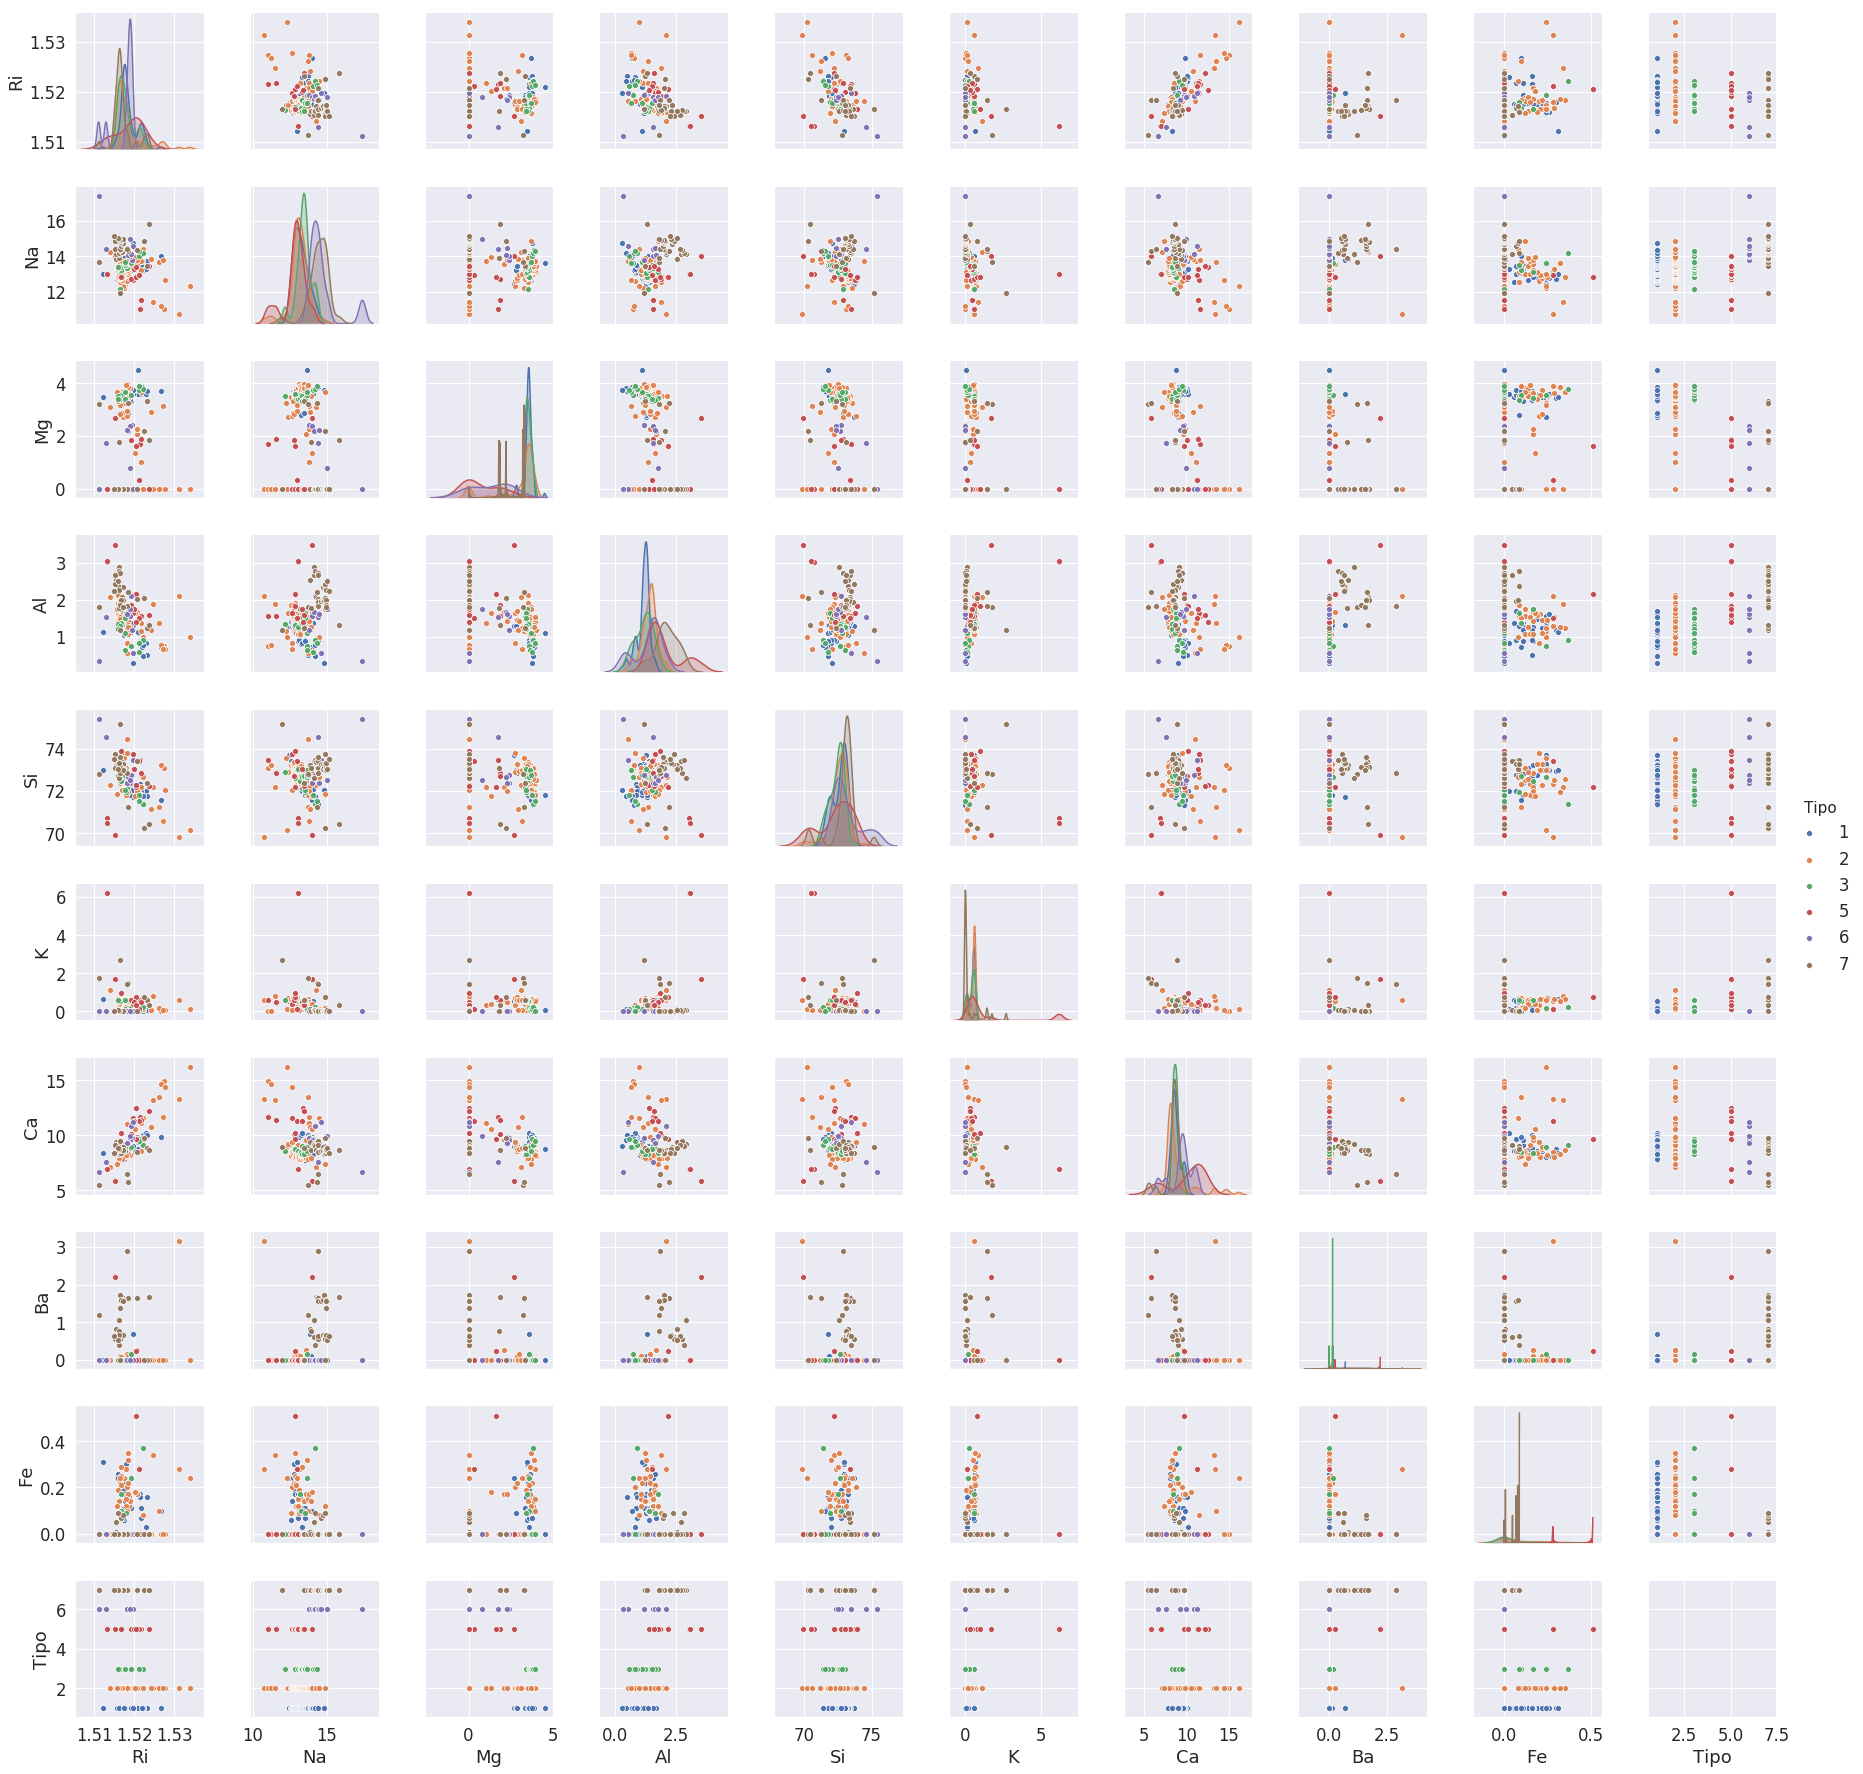

In [0]:
sns.pairplot(glass, hue='Tipo', size=2.5);

## Usando seaborn



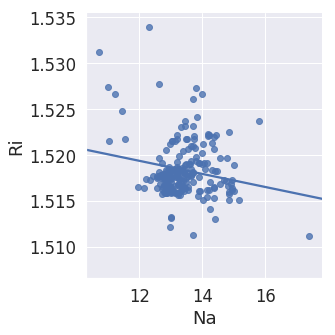

In [0]:
sns.lmplot(x='Na', y='Ri', data=glass, ci=None)

## Usando  Matplotlib

Text(0, 0.5, 'Ri')

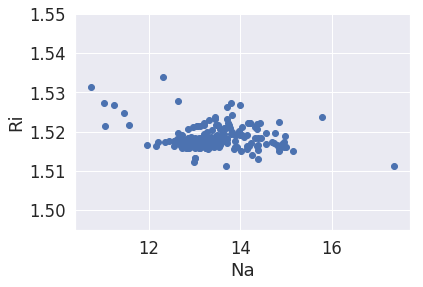

In [0]:
plt.scatter(glass.Na, glass.Ri)
plt.xlabel('Na')
plt.ylabel('Ri')

## Scatter plot usando Pandas

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


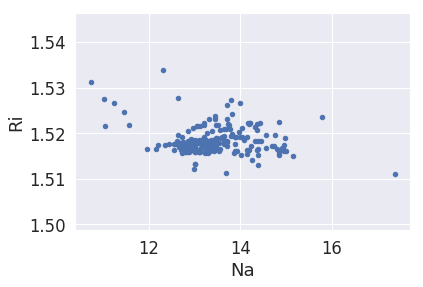

In [0]:
glass.plot(kind='scatter', x='Na', y='Ri')

## Ajuste el modelo usando  linear regression

In [0]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['Na']
X = glass[feature_cols]

y = glass.Ri
linreg.fit(X, y)


#hacer predicciones para X
glass['Ri_pred'] = linreg.predict(X)
glass.sample(5)


,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo,Ri_pred
Id,,,,,,,,,,,
30,1.51784,13.08,3.49,1.28,72.86,0.60,8.49,0.0,0.00,1,1.518599
31,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.0,0.14,1,1.518906
136,1.51789,13.19,3.90,1.30,72.33,0.55,8.44,0.0,0.28,2,1.518521
156,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.00,3,1.518628
171,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.0,0.00,5,1.518342


Graficando todo (data y prediccion)

Text(0, 0.5, 'Ri')

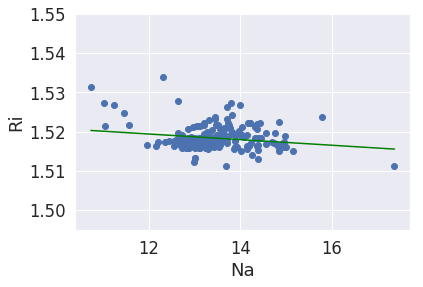

In [0]:
plt.scatter(glass.Na, glass.Ri)
plt.plot(glass.Na, glass.Ri_pred, color='green')
plt.xlabel('Na')
plt.ylabel('Ri')

Predecir la respuesta categórica

In [0]:
glass.groupby('Tipo').size().sort_index()

Tipo
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64

## Arreglando el problema multi clase a uno binario para propositos de usar regresion logistica binaria.

1.  Tipos 1, 2, 3 son vidrios de ventanas  
2.  Tipos 5, 6, 7 son vidrios de espejos




In [0]:
# Ejemplo de uso de diccionarios para relabeling
#dict ={'US':'US','Italy':'EU','Germany':'EU','Brazil':'LA','France':'EU'}
#df['Region']=df['Country'].apply(lambda x : dict[x])

dict ={1:0, 2:0, 3:0, 5:1, 6:1, 7:1}

glass['Clase'] = glass['Tipo'].apply(lambda x : dict[x])

glass.sample(5)


,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo,Ri_pred,Clase
Id,,,,,,,,,,,,
96,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.00,0.00,2,1.518400,0
196,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,0.05,7,1.517843,1
102,1.51730,12.35,2.72,1.63,72.87,0.70,9.23,0.00,0.00,2,1.519120,0
107,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2,1.520276,0
127,1.51667,12.94,3.61,1.26,72.75,0.56,8.60,0.00,0.00,2,1.518699,0


para conversiones de categorias mas avanzadas ver

https://chrisalbon.com/machine_learning/preprocessing_structured_data/convert_pandas_categorical_column_into_integers_for_scikit-learn/

Cambiemos nuestro enfoque, para poder predecir el tipo de vidrio usando Na. 

Text(0, 0.5, 'Tipo de vidrio')

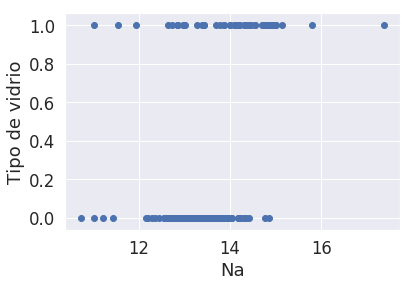

In [0]:
plt.scatter(glass.Na, glass.Clase)
plt.xlabel('Na')
plt.ylabel('Tipo de vidrio')

Text(0, 0.5, 'Clase')

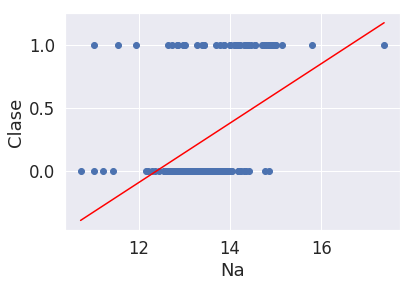

In [0]:


# fit a linear regression model and store the predictions
feature_cols = ['Na']
X = glass[feature_cols]
y = glass.Clase
linreg.fit(X, y)
glass['Clase_pred'] = linreg.predict(X)

# scatter plot that includes the regression line
plt.scatter(glass.Na, glass.Clase)
plt.plot(glass.Na, glass.Clase_pred, color='red')
plt.xlabel('Na')
plt.ylabel('Clase')


Si Na = 12, ML predice  0

Si Na= 16.5,  ML predice  1

Transformando una salida continua a binaria


In [0]:
glass['Transform_clase_pred'] = np.where(glass.Clase_pred >= 0.5, 1, 0)
glass.head()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo,Ri_pred,Clase,Clase_pred,Transform_clase_pred
Id,,,,,,,,,,,,,,
107,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2,1.520276,0,-0.395141,0
112,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2,1.520069,0,-0.326540,0
167,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.00,0.00,5,1.520062,1,-0.324175,0
111,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2,1.519920,0,-0.276864,0
106,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2,1.519763,0,-0.224822,0


Text(0, 0.5, 'Tipo de vidrio')

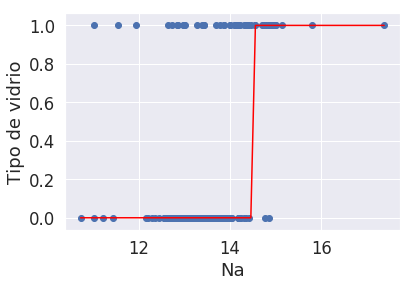

In [0]:
# plot the class predictions
plt.scatter(glass.Na, glass.Clase)
plt.plot(glass.Na, glass.Transform_clase_pred, color='red')
plt.xlabel('Na')
plt.ylabel('Tipo de vidrio')

## Parte 2: Usar regresión logística

In [0]:
# ajustar un modelo de regresion logistica y almacenar las predicciones de clase
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
feature_cols = ['Na']
X = glass[feature_cols]
y = glass.Clase
logreg.fit(X, y)
glass['Transform_clase_pred'] = logreg.predict(X)





/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


¿Si quisiéramos las probabilidades en lugar de solo las clases, para comprender que tan confiados estamos en una predicción dada?

Text(0, 0.5, 'Tipo de Vidrio')

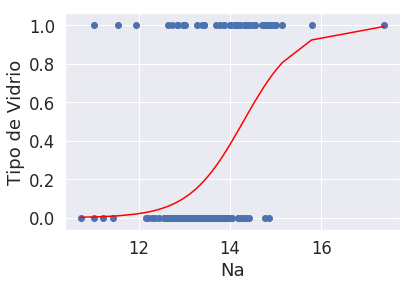

In [0]:
# Probabilidades
glass['Transform_clase_pred'] = logreg.predict_proba(X)[:, 1]

# Grafico
plt.scatter(glass.Na, glass.Clase)
plt.plot(glass.Na, glass.Transform_clase_pred, color='red')
plt.xlabel('Na')
plt.ylabel('Tipo de Vidrio')



## Que se podria decir de los coeficientes?

In [0]:
# Calcula la prediccion del log-odds para Na=15
logodds = logreg.intercept_ + logreg.coef_[0] * 15
logodds

array([1.17919477])

In [0]:
# Convertir log-odds a odds
odds = np.exp(logodds)
odds

array([3.25175473])

In [0]:
# convertir odds a probabilidad
prob = odds/(1 + odds)
prob

array([0.76480299])

In [0]:
# calcular la probabilidad para Na = 15 utilizando la prediccion de ML

data1 = np.array([15]).reshape(1, -1)
logreg.predict_proba(data1)[:, 1]



array([0.76480299])

## Tarea

Modificar el problema anterior para partir la data en 80 porciento para entrenamiento y 20 porciento para testing. Recordar normalizar la data. Usar directamente scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [0]:
# Escribir codigo
#
#

# Practica # 02

Un ataque al corazón es una emergencia médica. Un ataque cardíaco usualmente ocurre cuando un coágulo de sangre bloquea el flujo de sangre al corazón. Sin sangre, el tejido pierde oxígeno y muere. Los síntomas incluyen opresión o dolor en el pecho, cuello, espalda o brazos, así como fatiga, aturdimiento, latidos cardíacos anormales y ansiedad. El tratamiento abarca desde cambios en el estilo de vida y rehabilitación cardíaca hasta medicamentos, stents y cirugía de bypass.

En este problema vas a ayudar a un medico a dar una respuesta informada si el paciente esta a punto de tener un ataque al corazon (procentaje)



Los datos tiene 200 datos de entrenamiento de pacientes con 13 atributos medidos cada uno etiquetado debidamente con presencia o ausencia de enfermedad. Tu tarea es utiliza todo lo que se ha aprendido en el curso de ML para desarrollar un sistema medico de recomendacion inteligente.

Atributo:

1. edad
2. sexo
3. tipo de dolor en el pecho (4 valores)
4. presión arterial en reposo
5. colesterol en sangre mg / dl
6. azúcar en la sangre en ayunas > 120 mg / dl
7. Resultados electrocardiográficos en reposo (valores 0,1,2)
8. ritmo cardíaco máximo alcanzado
9. angina inducida por el ejercicio
10. oldpeak = ST depresión inducida por el ejercicio en relación con el descanso
11. la pendiente del segmento pico del ejercicio ST
12. número de vasos principales (0-3) coloreados por fluoroscopia
13. thal: 3 = normal; 6 = defecto fijo; 7 = defecto reversible
14. Variable a predecir: Ausencia o presencia de enfermedad

Tu nota va depender de la precicion de tu algoritmo de ML en 50 datos no vistos (no dados)

In [1]:
from google.colab import drive
drive.mount('/content/drive_all')

Drive already mounted at /content/drive_all; to attempt to forcibly remount, call drive.mount("/content/drive_all", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
col_names = ['Edad','Sexo','Dolor','Presion','Colesterol','Azucar','Electrocardiografia','Ritmo','Angina','Oldpeak','Segmento','Vasos','Tipo','Enfermedad']


data='/content/drive_all/My Drive/dataset/AC_train.dat'

df = pd.read_csv(data, names=col_names, index_col=False)

df.sample(5)
df.describe()
df.info()
df.describe(include=['object', 'bool', 'category'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
Edad                   200 non-null int64
Sexo                   200 non-null int64
Dolor                  200 non-null int64
Presion                200 non-null int64
Colesterol             200 non-null int64
Azucar                 200 non-null int64
Electrocardiografia    200 non-null int64
Ritmo                  200 non-null int64
Angina                 200 non-null int64
Oldpeak                200 non-null float64
Segmento               200 non-null int64
Vasos                  200 non-null int64
Tipo                   200 non-null int64
Enfermedad             200 non-null object
dtypes: float64(1), int64(12), object(1)
memory usage: 22.0+ KB


,Enfermedad
count,200
unique,2
top,absent
freq,113


In [0]:
# Escribir programa
#
#